In [163]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [164]:
for dirname, _, filenames in os.walk(os.path.join('..','extraction','raw_data')):
    for filename in filenames:
        print(os.path.join(dirname, filename))

..\extraction\raw_data\teams_data.csv
..\extraction\raw_data\day4\attacking_data.csv
..\extraction\raw_data\day4\attempts_data.csv
..\extraction\raw_data\day4\defending_data.csv
..\extraction\raw_data\day4\disciplinary_data.csv
..\extraction\raw_data\day4\distribution_data.csv
..\extraction\raw_data\day4\goalkeeping_data.csv
..\extraction\raw_data\day4\goals_data.csv
..\extraction\raw_data\day4\key_stats_data.csv
..\extraction\raw_data\day4\players_data.csv


In [165]:
players_df = pd.read_csv('../extraction/raw_data/day4/players_data.csv')
disciplinary_df = pd.read_csv('../extraction/raw_data/day4/disciplinary_data.csv')
attempts_df = pd.read_csv('../extraction/raw_data/day4/attempts_data.csv')
distribution_df = pd.read_csv('../extraction/raw_data/day4/distribution_data.csv')
key_stats_df = pd.read_csv('../extraction/raw_data/day4/key_stats_data.csv')
attacking_df = pd.read_csv('../extraction/raw_data/day4/attacking_data.csv')
goals_df = pd.read_csv('../extraction/raw_data/day4/goals_data.csv')
goalkeeping_df = pd.read_csv('../extraction/raw_data/day4/goalkeeping_data.csv')
defending_df = pd.read_csv('../extraction/raw_data/day4/defending_data.csv')

## Feature Selection

In [166]:
distribution_df

,id_player,passing_accuracy(%),passes_attempted,passes_completed,crossing_accuracy(%),crosses_attempted,crosses_completed,free_kick_taken,matches_appearance
0,250050416,100.0,19.0,19.0,0.0,0.0,0.0,0.0,1.0
1,250138626,100.0,17.0,17.0,0.0,0.0,0.0,0.0,1.0
2,1902445,100.0,14.0,14.0,0.0,0.0,0.0,0.0,1.0
3,250089626,100.0,13.0,13.0,0.0,0.0,0.0,0.0,2.0
4,250169763,100.0,10.0,10.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...
903,250011071,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
904,250000104,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
905,108501,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
906,103827,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [167]:
# Selecting features 
goals = goals_df[['id_player','goals']].copy()
key_stats = key_stats_df[['id_player','top_speed(km/h)','matches_appareance','minutes_played','distance_covered(km)']].copy()
attacking = attacking_df[['id_player','assists','dribbles']].copy()
attempts = attempts_df[['id_player','attempts_on_target','total_attempts']].copy()
distribution = distribution_df[['id_player','passing_accuracy(%)','crossing_accuracy(%)']]
deffending = defending_df[['id_player','tackles_won', 'balls_recovered']]

# Merging all dataframes with offensive features
merged_df = pd.merge(goals, key_stats, on='id_player', how='inner')
merged_df = pd.merge(merged_df, attacking, on='id_player', how='inner')
merged_df = pd.merge(merged_df, attempts, on='id_player', how='inner')
merged_df = pd.merge(merged_df, distribution, on='id_player', how='inner')
merged_df = pd.merge(merged_df, deffending, on='id_player', how='inner')
merged_df.set_index('id_player', inplace=True)
merged_df

,goals,top_speed(km/h),matches_appareance,minutes_played,distance_covered(km),assists,dribbles,attempts_on_target,total_attempts,passing_accuracy(%),crossing_accuracy(%),tackles_won,balls_recovered
id_player,,,,,,,,,,,,,
250112880,5.0,33.37,4.0,314.0,38.69,3.0,7.0,5.0,15.0,71.00,23.08,1.0,3.0
250139445,3.0,32.10,4.0,341.0,45.62,0.0,15.0,6.0,10.0,88.50,20.00,0.0,10.0
250121533,4.0,35.47,4.0,360.0,38.39,0.0,34.0,10.0,17.0,76.00,37.50,0.0,5.0
250159544,3.0,33.04,3.0,247.0,31.41,0.0,7.0,3.0,6.0,84.34,0.00,0.0,6.0
250091187,3.0,31.92,3.0,196.0,22.70,0.0,2.0,4.0,5.0,76.00,0.00,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250011071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN
250000104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN
108501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN


## Exploration and Data Preprocessing

In [168]:
# General information about offensive features
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 250112880 to 101585
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   goals                 727 non-null    float64
 1   top_speed(km/h)       727 non-null    float64
 2   matches_appareance    727 non-null    float64
 3   minutes_played        727 non-null    float64
 4   distance_covered(km)  727 non-null    float64
 5   assists               727 non-null    float64
 6   dribbles              727 non-null    float64
 7   attempts_on_target    727 non-null    float64
 8   total_attempts        727 non-null    float64
 9   passing_accuracy(%)   727 non-null    float64
 10  crossing_accuracy(%)  908 non-null    float64
 11  tackles_won           727 non-null    float64
 12  balls_recovered       727 non-null    float64
dtypes: float64(13)
memory usage: 99.3 KB


In [169]:
# Descriptive statistics
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
goals,727.0,0.283356,0.715461,0.00,0.000,0.00,0.000,5.00
top_speed(km/h),727.0,31.217923,2.788519,19.51,30.225,31.81,33.020,36.55
matches_appareance,727.0,2.990371,1.088971,1.00,2.000,3.00,4.000,4.00
minutes_played,727.0,190.429161,117.947087,1.00,90.000,186.00,296.000,360.00
distance_covered(km),727.0,22.379546,13.723543,0.33,10.460,21.48,34.270,50.46
assists,727.0,0.217331,0.550058,0.00,0.000,0.00,0.000,4.00
dribbles,727.0,2.795048,4.318016,0.00,0.000,1.00,3.500,34.00
attempts_on_target,727.0,0.928473,1.571212,0.00,0.000,0.00,1.000,12.00
total_attempts,727.0,2.569464,3.272357,0.00,0.000,1.00,4.000,21.00
passing_accuracy(%),727.0,81.494457,14.996410,0.00,77.000,85.00,90.585,100.00


In [170]:
# Check for missing values
merged_df.isnull().sum()

goals                   181
top_speed(km/h)         181
matches_appareance      181
minutes_played          181
distance_covered(km)    181
assists                 181
dribbles                181
attempts_on_target      181
total_attempts          181
passing_accuracy(%)     181
crossing_accuracy(%)      0
tackles_won             181
balls_recovered         181
dtype: int64

In [171]:
# Drop NaN values
general_df = merged_df.dropna()

In [172]:
# Check for duplicates
general_df.duplicated().sum()

np.int64(0)

## Feature Scaling

In [173]:
from scipy import stats

for col in general_df.columns:
    stat, p = stats.shapiro(general_df[col])
    if p > 0.05:
        print(f"{col.rjust(30)}: follows a normal distribution")
    else:
        print(f"{col.rjust(30)}: does not follow a normal distribution")

                         goals: does not follow a normal distribution
               top_speed(km/h): does not follow a normal distribution
            matches_appareance: does not follow a normal distribution
                minutes_played: does not follow a normal distribution
          distance_covered(km): does not follow a normal distribution
                       assists: does not follow a normal distribution
                      dribbles: does not follow a normal distribution
            attempts_on_target: does not follow a normal distribution
                total_attempts: does not follow a normal distribution
           passing_accuracy(%): does not follow a normal distribution
          crossing_accuracy(%): does not follow a normal distribution
                   tackles_won: does not follow a normal distribution
               balls_recovered: does not follow a normal distribution


In [174]:
general_df

,goals,top_speed(km/h),matches_appareance,minutes_played,distance_covered(km),assists,dribbles,attempts_on_target,total_attempts,passing_accuracy(%),crossing_accuracy(%),tackles_won,balls_recovered
id_player,,,,,,,,,,,,,
250112880,5.0,33.37,4.0,314.0,38.69,3.0,7.0,5.0,15.0,71.00,23.08,1.0,3.0
250139445,3.0,32.10,4.0,341.0,45.62,0.0,15.0,6.0,10.0,88.50,20.00,0.0,10.0
250121533,4.0,35.47,4.0,360.0,38.39,0.0,34.0,10.0,17.0,76.00,37.50,0.0,5.0
250159544,3.0,33.04,3.0,247.0,31.41,0.0,7.0,3.0,6.0,84.34,0.00,0.0,6.0
250091187,3.0,31.92,3.0,196.0,22.70,0.0,2.0,4.0,5.0,76.00,0.00,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250007631,0.0,24.12,1.0,90.0,5.11,0.0,0.0,0.0,0.0,70.00,0.00,0.0,0.0
250004986,0.0,26.69,1.0,12.0,1.63,0.0,0.0,0.0,0.0,50.00,0.00,0.0,0.0
1905643,0.0,31.62,1.0,85.0,10.42,0.0,4.0,1.0,1.0,75.00,0.00,0.0,7.0


In [175]:
# Create a pipeline with MinMaxScaler
pipeline_minmax = Pipeline([
    ('scaler', MinMaxScaler())
])

# Apply scaling to the entire DataFrame and convert the result to a DataFrame
df_scaled = pd.DataFrame(
    pipeline_minmax.fit_transform(general_df), 
    columns=general_df.columns, 
    index=general_df.index)

## Determine the Optimal Number of Clusters

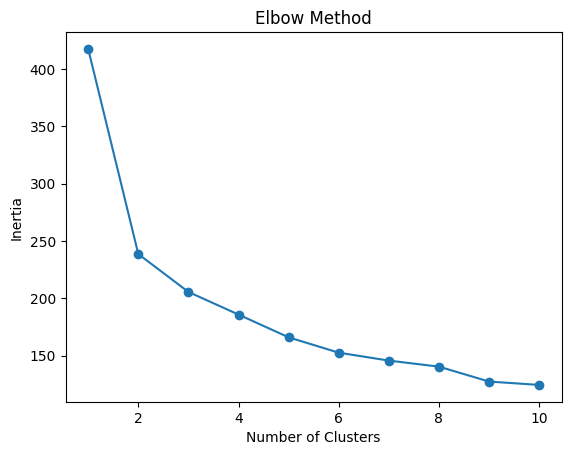

In [176]:
# Elbow method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


## Apply Clustering Algorithm (K-Means)

In [177]:
# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')  # Change the number of clusters based on the elbow method
general_df['cluster'] = kmeans.fit_predict(df_scaled)

# Display the first results with cluster labels
general_df.head()

,goals,top_speed(km/h),matches_appareance,minutes_played,distance_covered(km),assists,dribbles,attempts_on_target,total_attempts,passing_accuracy(%),crossing_accuracy(%),tackles_won,balls_recovered,cluster
id_player,,,,,,,,,,,,,,
250112880,5.0,33.37,4.0,314.0,38.69,3.0,7.0,5.0,15.0,71.00,23.08,1.0,3.0,2
250139445,3.0,32.10,4.0,341.0,45.62,0.0,15.0,6.0,10.0,88.50,20.00,0.0,10.0,2
250121533,4.0,35.47,4.0,360.0,38.39,0.0,34.0,10.0,17.0,76.00,37.50,0.0,5.0,2
250159544,3.0,33.04,3.0,247.0,31.41,0.0,7.0,3.0,6.0,84.34,0.00,0.0,6.0,2
250091187,3.0,31.92,3.0,196.0,22.70,0.0,2.0,4.0,5.0,76.00,0.00,2.0,5.0,2


## Visualize the clusters

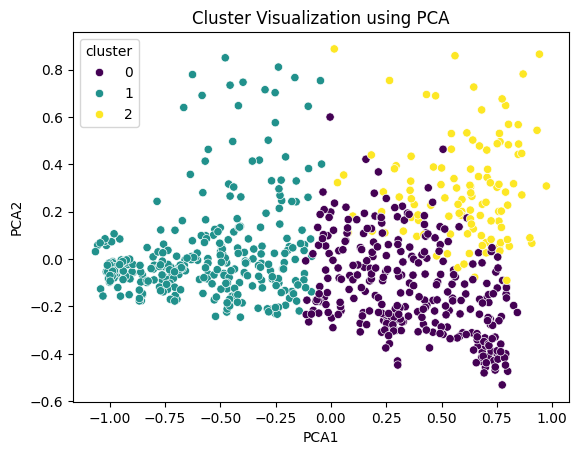

In [184]:
# Reduce dimensionality with PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
print()

# Create a DataFrame with PCA results
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = general_df['cluster']

# Plot the clusters
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_pca, palette='viridis')
plt.title('Cluster Visualization using PCA')
plt.show()


In [179]:
# Analyze each cluster
df_clustered = general_df.groupby('cluster').mean()

# Display the average characteristics of each cluster
df_clustered


,goals,top_speed(km/h),matches_appareance,minutes_played,distance_covered(km),assists,dribbles,attempts_on_target,total_attempts,passing_accuracy(%),crossing_accuracy(%),tackles_won,balls_recovered
cluster,,,,,,,,,,,,,
0,0.151815,31.503597,3.729373,268.323432,30.692607,0.161716,2.613861,0.633663,2.214521,84.686997,10.381947,1.716172,12.171617
1,0.090032,30.318907,1.945338,75.836013,9.206688,0.064309,1.083601,0.311897,0.903537,78.563280,9.513762,0.453376,2.758842
2,1.168142,32.926195,3.884956,296.946903,36.343274,0.787611,7.991150,3.415929,8.106195,81.001150,30.455133,1.070796,7.548673


In [180]:
# Merge 'player_name' column 
general_df = general_df.merge(players_df[['id_player', 'player_name']], on='id_player', how='inner')
general_df.sample(5)

,id_player,goals,top_speed(km/h),matches_appareance,minutes_played,distance_covered(km),assists,dribbles,attempts_on_target,total_attempts,passing_accuracy(%),crossing_accuracy(%),tackles_won,balls_recovered,cluster,player_name
80,250091290,1.0,35.14,4.0,310.0,40.63,1.0,5.0,2.0,7.0,88.25,33.34,4.0,20.0,2,Mahdi Camara
194,250157930,0.0,33.14,4.0,308.0,37.83,0.0,18.0,0.0,7.0,68.50,20.00,5.0,14.0,0,Joel Monteiro
547,250134190,0.0,30.93,2.0,29.0,4.71,0.0,0.0,0.0,0.0,37.50,0.00,0.0,0.0,1,Arthur Cabral
44,250101534,3.0,32.90,4.0,303.0,38.33,1.0,6.0,7.0,17.0,91.50,23.81,2.0,6.0,2,Phil Foden
151,250196543,0.0,32.56,4.0,170.0,21.48,0.0,0.0,1.0,4.0,73.00,0.00,1.0,3.0,0,Santiago Castro


In [181]:
general_df[general_df["cluster"]==0]['player_name']

7      Hakan Çalhanoğlu
13        Hugo Magnetti
14          Zeno Debast
19       Wilfried Singo
21       Kastriot Imeri
             ...       
494       Konrad Laimer
497      Bernardo Silva
498      Lukáš Haraslín
504      Thomas Meunier
509      Lukas Hradecky
Name: player_name, Length: 303, dtype: object

In [182]:
general_df[general_df["cluster"]==1]['player_name']

6              Karim Adeyemi
20      Mathias Pereira Lage
22                    Juanpe
23            Jerdy Schouten
24         Pierre Lees-Melou
               ...          
722    Marc-André ter Stegen
723           Lukáš Pauschek
724              Juraj Kucka
725             Sven Ulreich
726              Daley Blind
Name: player_name, Length: 311, dtype: object

In [183]:
general_df[general_df["cluster"]==2]['player_name']

0                Raphinha
1           Florian Wirtz
2         Vinícius Júnior
3          Antoni Milambo
4        Sandro Kulenović
              ...        
413        Jamie Leweling
419               Rodrygo
451    Veljko Birmančević
472        Arnaut Danjuma
489       Ousmane Dembélé
Name: player_name, Length: 113, dtype: object

## Results Interpretation

#### Cluster 0

This cluster seems to represent players with a supporting role or lower offensive profile. They have low goals, assists, 
and dribbles, indicating limited offensive contributions. These players participate in fewer games and cover less distance 
on the field. However, they have a good passing accuracy (84.7%), suggesting they are skilled in distributing the ball, 
though with limited success in shooting and crossing.

#### Cluster 1

This group likely consists of players with minimal involvement in the game. Their statistics are very low in terms of goals, assists, dribbles, and other offensive actions. These players appear to play fewer matches and cover less distance on the field. Their overall contribution is limited, and while their passing accuracy is moderate, they don't engage much offensively or defensively.

#### Cluster 2

This group likely represents dynamic and offensive players. They are faster, with a higher number of goals, dribbles, and attempts on goal. These players are heavily involved in the attack, with many shots and on-target attempts. They cover more distance on the field, indicating an energetic playing style. They also have a good crossing accuracy and moderate participation in assists. This cluster represents key offensive players.

## General Summary:
#### Cluster 0: Players with a supporting role and good passing abilities, but limited offensive contributions.
#### Cluster 1: Players with minimal involvement in the game, contributing very little offensively or defensively.
#### Cluster 2: Key offensive players who are fast, contribute significantly in terms of goals and dribbles, and cover more distance on the field.